In [47]:
######## Problem statement and dataset description
#This project builds a neural network to classify handwritten digits 0 and 1 using 20x20 grayscale images. 
#Each image is turned into 400 features based on pixel intensity and labeled as either 0 or 1. 
#The dataset includes 1,000 images to train and test the model.

In [44]:
# Load Dataset

import pandas as pd
data = pd . read_csv ("binary_digits.csv")
X = data . iloc [: , : -1]. values
y = data . iloc [: , -1]. values 
print (" Shape of X:", X. shape )
print (" Shape of y:", y. shape )

# Output: 
# The output indicates that X is a dataset with 1000 samples, with 400 features each.
# y is a label vector with 1000 values, one per sample.

 Shape of X: (1000, 400)
 Shape of y: (1000,)


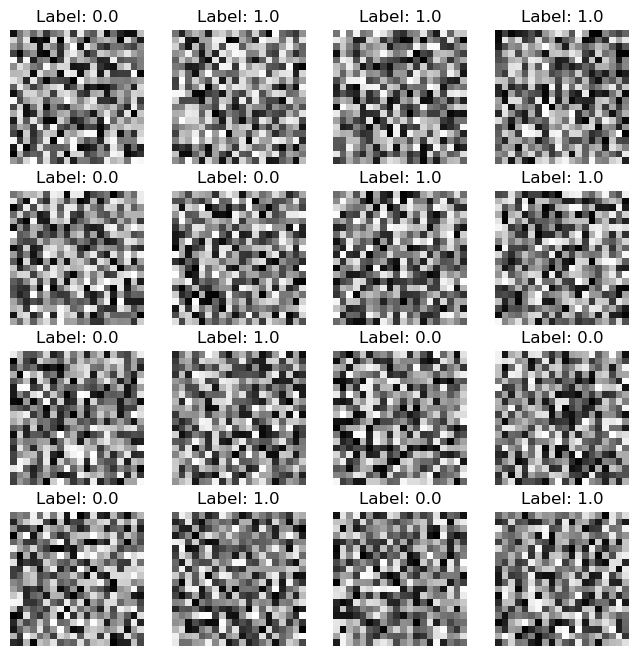

In [9]:
# Visualize Data

import matplotlib . pyplot as plt
import numpy as np
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(X.shape[0])
    ax.imshow(X[index].reshape(20, 20).T, cmap='gray')
    ax.set_title(f"Label: {y[index]}")
    ax.axis('off')
plt.show()

# Output: 
# A 4x4 grid of grayscale images is outputted.
# Each represent handwritten binary digit (0 or 1), labeled with its corresponding class

In [ ]:
##### Neural Network Architecture

# The neural network is a simple feedforward model with 400 input neurons (one for each pixel)
# Hidden layer of 25 neurons using relu and an output layer with one neuron using sigmoid for binary classification. 
# Another version was tested with 50 hidden neurons and tanh activation to see if it performed better.

In [21]:
#  Implementation in TensorFlow/Keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
# Model 1
model = Sequential([
    Dense(25, activation='relu', input_shape=(400,)), 
    Dense(1, activation='sigmoid')  
])

model.summary()

# Output: 
# This is a simple feedforward neural network.
# - 400 input features
# -One hidden layer with 25 neurons (ReLU activation)
# - One output neuron (Sigmoid activation for binary classification)
# - Total trainable parameters: 10,051

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,051 (39.26 KB)

 Trainable params: 10,051 (39.26 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile the Model

model.compile(
    optimizer='adam',  
    loss='binary_crossentropy',  
    metrics=['accuracy']  
)
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

# Output: 
# - 20 lines, one per epochs
# - Initially, accuracy is  roughly 50%, meaning the model starts off by guessing
# - Over time, accuracy increases, and loss decreases, showing the model is learning
# - When val_accuracy decreases and accuracy increases, model is overfitting
# - output helps track training progress and diagnose model performance over time

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5085 - loss: 0.7185 - val_accuracy: 0.5150 - val_loss: 0.6963
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5482 - loss: 0.6887 - val_accuracy: 0.5150 - val_loss: 0.7011
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5385 - loss: 0.6893 - val_accuracy: 0.4300 - val_loss: 0.7047
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5053 - loss: 0.6988 - val_accuracy: 0.4750 - val_loss: 0.6984
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5655 - loss: 0.6827 - val_accuracy: 0.5000 - val_loss: 0.6955
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5757 - loss: 0.6757 - val_accuracy: 0.4750 - val_loss: 0.7021
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6085 - loss: 0.6697 - val_accuracy: 0.5550 - val_loss: 0.6904
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6274 - loss: 0.6589 - val_accuracy: 0.4400 - val_loss

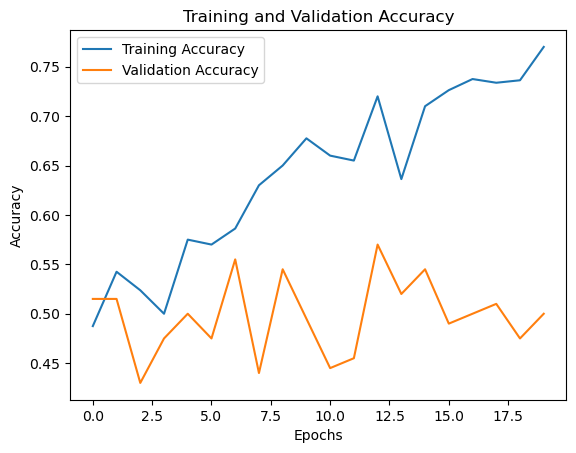

In [30]:
# Plot training accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')  
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.xlabel('Epochs')  
plt.ylabel('Accuracy') 
plt.legend()
plt.title('Training and Validation Accuracy')  
plt.show()

In [ ]:
#Output: 
# - plots the training and validation accuracy over 20 epochs to see how well the model learns
# - Training Accuracy is greater than Validation Accuracy
# - The model learns well on training data, but not good with generalization
#- the changing validation (going high to low) accuracy shows there coulf be nstability and overfitting


In [34]:
#Evaluate the Model

from sklearn.metrics import classification_report , confusion_matrix

# Predict labels
y_pred = (model.predict(X) >= 0.5).astype (int)
# Print classification report
print ( classification_report (y , y_pred))
# Confusion matrix
conf_matrix = confusion_matrix (y , y_pred)
print("Confusion Matrix :\n",conf_matrix)

# Outcome: 
# - 74% overall accuracy (740/1000 samples)
# - Precision and recall are generally balanced
#-  f1-score(0.74) not perfect balance between precision and recall

# 391 True Negatives correctly predicted 0
# 346 True Positives correctly predicted 1
# 126 False Positives, predicted 1, but it was actually 0
# 137 False Negatives, predicted 0, but it was actually 1

# model misses more positives than it falsely detects
# overall good accuracy of 74%

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       517
         1.0       0.73      0.72      0.72       483

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000

Confusion Matrix :
 [[391 126]
 [137 346]]


In [69]:
# Experimentation with Hyperparameters

# Model 2
#tanh activation function 25 neurons 
model = Sequential([
    Input(shape=(400,)),  
    Dense(25, activation='tanh'),  
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,051 (39.26 KB)

 Trainable params: 10,051 (39.26 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Model 3
#tanh activation function 100 neurons 
model = Sequential([
    Input(shape=(400,)),  
    Dense(100, activation='tanh'),  
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,201 (157.04 KB)

 Trainable params: 40,201 (157.04 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Model 4
#reul activation function 100 neurons 
model = Sequential([
    Input(shape=(400,)),  
    Dense(100, activation='relu'),  
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,201 (157.04 KB)

 Trainable params: 40,201 (157.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# - All models are feedforward neural networks with one hidden layer
# - Each model takes 400 input features
# - Models with the same number of neurons have the same number of parameters, regardless of activation function
# - 100 neurons Models(3 & 4) have more parameters(40,201) than Models 1 & 2(10,051)
# - Increasing the risk of overfitting for models 3 and 4
# - Relu and tanh changes models learning speed and convergence
# - For generalization Model 1 is the best
# - For higher accuracy, Model 4 best but needs regularization 

In [ ]:
##### Conclusion 

# Model Performance:
# - Model had 74% accuracy, showing is has a moderate ability to classify 0 and 1 correctly
# - Precision and recall were pretty balanced
# - Confusion matrix showed that the model missed more positive cases(false negatives) than it falsely detected(false positives)

# Challenges: 
# - Training accuracy improved, but validation accuracy went up and down meaning instable
# - Model learned the training data well but did not for unseen data
# - Maybe with larger dataset the model could have learned more

# Potential Improvements: 
# - Adjust learning rate or number of neurons to find the best balance
# - Adding more hidden layers
# - Larger data set 
# - Lowering the threshold for sigmoid to make it so that tthe model more likely to predict 1 which can reduce the false negatives we see
